[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/arvidl/ELMED219-2026/blob/main/Lab3-GenAI-LLM/notebooks/08-nevrosymbolsk-ai.ipynb)

# Nevrosymbolsk AI - Hybrid intelligens

**ELMED219 / BMED365 - Lab 3**

---

## Læringsmål

Etter denne notebooken skal du kunne:
- Forklare forskjellen mellom nevrale og symbolske AI-tilnærminger
- Beskrive konseptet nevrosymbolsk AI (hybrid AI)
- Forstå rollen til kunnskapsgrafer i medisinsk AI
- Diskutere hvordan nevrosymbolsk AI kan forbedre forklarbarhet og pålitelighet

## Innhold

1. [To tradisjoner i AI](#1-to-tradisjoner-i-ai)
2. [Nevrosymbolsk integrasjon](#2-nevrosymbolsk-integrasjon)
3. [Kunnskapsgrafer](#3-kunnskapsgrafer)
4. [Medisinske ontologier](#4-medisinske-ontologier)
5. [Anvendelser i medisin](#5-anvendelser-i-medisin)
6. [**Case study: Nevrosymbolsk AI for hjernesvulster (Gliom)**](#6-case-study-hjernesvulster)
   - [Agentisk AI: Neste steg for klinisk beslutningsstøtte](#agentisk-ai)
7. [Fremtidsperspektiver](#7-fremtidsperspektiver)

---

## 1. To tradisjoner i AI

Kunstig intelligens har historisk sett utviklet seg langs to hovedlinjer:

### Symbolsk AI ("Good Old-Fashioned AI")

- Eksplisitt representasjon av kunnskap
- Logisk resonnering og regler
- Tolkbare beslutninger
- Eksempler: Ekspertsystemer, beslutningstrær

### Nevralt (sub-symbolsk) AI

- Lærer mønstre fra data
- Implisitt kunnskapsrepresentasjon (vekter)
- Ofte "sort boks"
- Eksempler: Nevrale nettverk, LLM-er

In [3]:
# Sammenligning av tilnærmingene

tilnaerminger = {
    "Symbolsk AI": {
        "styrker": [
            "Tolkbart - vi forstår hvorfor",
            "Kan inkorporere ekspertkunnskap direkte",
            "Garanterte egenskaper (bevisbar)",
            "Fungerer med lite data"
        ],
        "svakheter": [
            "Krever manuell kunnskapsmodellering",
            "Håndterer ikke usikkerhet godt",
            "Skalerer dårlig til komplekse problemer",
            "Brittle - feiler på uventet input"
        ]
    },
    "Nevral AI": {
        "styrker": [
            "Lærer automatisk fra data",
            "Håndterer komplekse mønstre",
            "Robust mot støy",
            "Skalerer til store problemer"
        ],
        "svakheter": [
            "Krever store mengder data",
            "Vanskelig å tolke (sort boks)",
            "Kan lære bias fra data",
            "Mangler garantier"
        ]
    }
}

print("SYMBOLSK vs. NEVRAL AI")
print("=" * 60)

for navn, info in tilnaerminger.items():
    print(f"\n{navn}:")
    print("-" * 40)
    print("Styrker:")
    for s in info['styrker']:
        print(f"  + {s}")
    print("Svakheter:")
    for s in info['svakheter']:
        print(f"  - {s}")

SYMBOLSK vs. NEVRAL AI

Symbolsk AI:
----------------------------------------
Styrker:
  + Tolkbart - vi forstår hvorfor
  + Kan inkorporere ekspertkunnskap direkte
  + Garanterte egenskaper (bevisbar)
  + Fungerer med lite data
Svakheter:
  - Krever manuell kunnskapsmodellering
  - Håndterer ikke usikkerhet godt
  - Skalerer dårlig til komplekse problemer
  - Brittle - feiler på uventet input

Nevral AI:
----------------------------------------
Styrker:
  + Lærer automatisk fra data
  + Håndterer komplekse mønstre
  + Robust mot støy
  + Skalerer til store problemer
Svakheter:
  - Krever store mengder data
  - Vanskelig å tolke (sort boks)
  - Kan lære bias fra data
  - Mangler garantier


---

## 2. Nevrosymbolsk integrasjon

**Nevrosymbolsk AI** kombinerer det beste fra begge verdener:

```
┌─────────────────────────────────────────────────────────────┐
│                    NEVROSYMBOLSK AI                         │
├─────────────────────────────────────────────────────────────┤
│                                                             │
│   Symbolsk lag                    Nevralt lag               │
│   ┌───────────┐                   ┌───────────┐             │
│   │ Kunnskap  │ ←──────────────→  │  Mønstre  │             │
│   │ Regler    │    Integrasjon    │  Data     │             │
│   │ Ontologi  │                   │  Læring   │             │
│   └───────────┘                   └───────────┘             │
│        ↓                               ↓                    │
│   Forklaring                     Fleksibilitet              │
│   Garantier                      Robusthet                  │
│                                                             │
└─────────────────────────────────────────────────────────────┘
```

### Integrasjonsstrategier

1. **Symbolsk→Nevral**: Bruk kunnskapsgraf til å forbedre nettverkstrening
2. **Nevral→Symbolsk**: Ekstrahér symbolsk kunnskap fra lærte modeller
3. **Hybrid resonnering**: Kombiner logisk og probabilistisk inferens

---

## 3. Kunnskapsgrafer

En **kunnskapsgraf** representerer kunnskap som et nettverk av entiteter (noder) og relasjoner (kanter).

### Struktur

```
(Entitet) --[relasjon]--> (Entitet)

Eksempel:
(Diabetes) --[behandles_med]--> (Metformin)
(Metformin) --[er_en]--> (Antidiabetikum)
(Diabetes) --[har_symptom]--> (Polyuri)
```

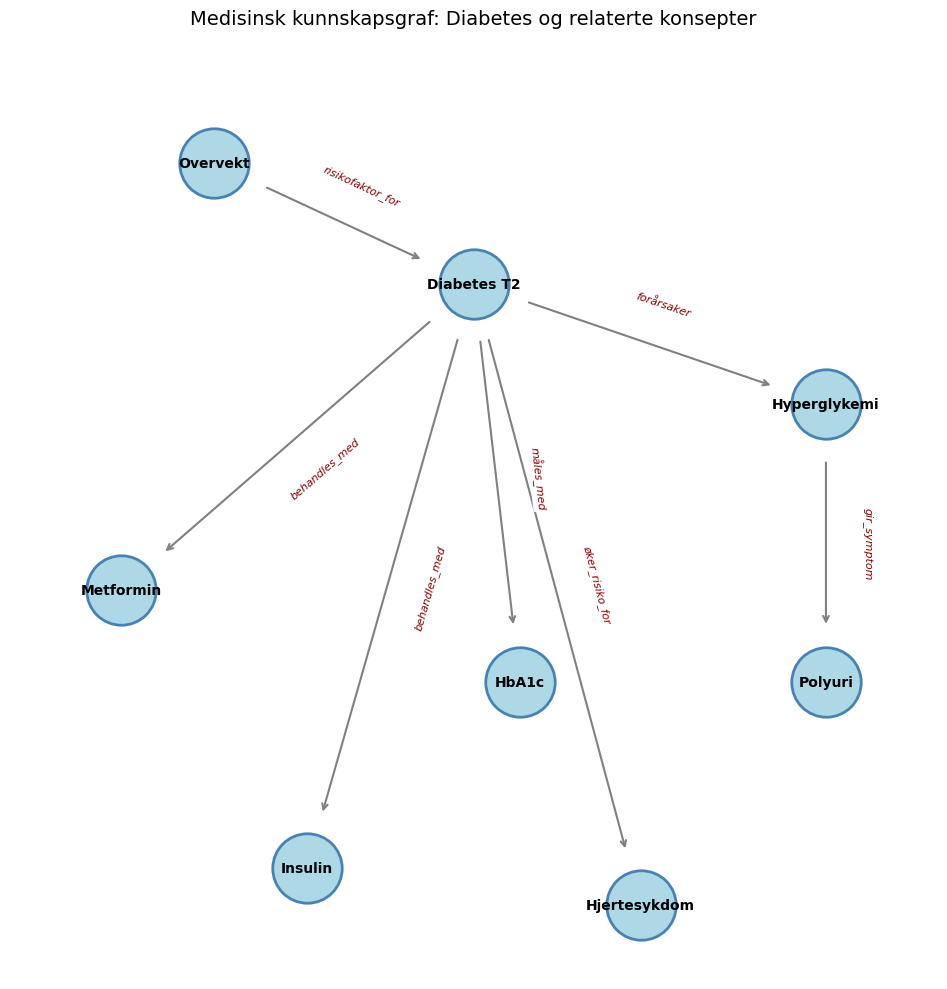

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Enkel kunnskapsgraf-visualisering

def tegn_medisinsk_kunnskapsgraf():
    """
    Tegner en enkel medisinsk kunnskapsgraf med forbedret lesbarhet.
    Kant-annoteringer plasseres slik at de ikke overlapper med noder.
    """
    fig, ax = plt.subplots(figsize=(14, 10))
    
    # Definer noder (entiteter) - justert layout for bedre lesbarhet
    noder = {
        'Diabetes T2': (0.5, 0.75),
        'Metformin': (0.12, 0.42),
        'Insulin': (0.32, 0.12),
        'Hyperglykemi': (0.88, 0.62),
        'Polyuri': (0.88, 0.32),
        'HbA1c': (0.55, 0.32),
        'Overvekt': (0.22, 0.88),
        'Hjertesykdom': (0.68, 0.08)
    }
    
    # Definer kanter (relasjoner)
    kanter = [
        ('Diabetes T2', 'Metformin', 'behandles_med'),
        ('Diabetes T2', 'Insulin', 'behandles_med'),
        ('Diabetes T2', 'Hyperglykemi', 'forårsaker'),
        ('Hyperglykemi', 'Polyuri', 'gir_symptom'),
        ('Diabetes T2', 'HbA1c', 'måles_med'),
        ('Overvekt', 'Diabetes T2', 'risikofaktor_for'),
        ('Diabetes T2', 'Hjertesykdom', 'øker_risiko_for')
    ]
    
    # Tegn noder
    for navn, (x, y) in noder.items():
        ax.scatter(x, y, s=2500, c='lightblue', edgecolors='steelblue', linewidths=2, zorder=3)
        ax.annotate(navn, (x, y), ha='center', va='center', fontsize=10, fontweight='bold')
    
    # Tegn kanter med forbedret label-plassering
    for fra, til, relasjon in kanter:
        x1, y1 = noder[fra]
        x2, y2 = noder[til]
        
        # Beregn kantvektor
        dx = x2 - x1
        dy = y2 - y1
        length = np.sqrt(dx**2 + dy**2)
        
        # Normaliser retningsvektor
        ux, uy = dx / length, dy / length
        
        # Beregn perpendikular vektor (for offset)
        px, py = -uy, ux
        
        # Juster start- og sluttpunkt for å unngå overlapp med noder
        node_radius = 0.06
        start_x = x1 + ux * node_radius
        start_y = y1 + uy * node_radius
        end_x = x2 - ux * node_radius
        end_y = y2 - uy * node_radius
        
        # Tegn pil
        ax.annotate('', xy=(end_x, end_y), xytext=(start_x, start_y),
                    arrowprops=dict(arrowstyle='->', color='gray', lw=1.5),
                    zorder=1)
        
        # Beregn label-posisjon langs kanten (midt på, men med offset)
        label_x = (x1 + x2) / 2
        label_y = (y1 + y2) / 2
        
        # Offset label perpendikuart til kanten (unngå overlapp)
        offset_distance = 0.045
        label_x += px * offset_distance
        label_y += py * offset_distance
        
        # Beregn rotasjonsvinkel for teksten
        angle = np.degrees(np.arctan2(dy, dx))
        if angle > 90:
            angle -= 180
        elif angle < -90:
            angle += 180
        
        # Legg til relasjonsnavn med rotasjon og hvit bakgrunn
        ax.annotate(relasjon, (label_x, label_y), fontsize=8, color='darkred',
                    ha='center', va='center', style='italic',
                    rotation=angle, rotation_mode='anchor',
                    bbox=dict(boxstyle='round,pad=0.15', facecolor='white', 
                              edgecolor='none', alpha=0.9))
    
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title('Medisinsk kunnskapsgraf: Diabetes og relaterte konsepter', fontsize=14, pad=20)
    
    plt.tight_layout()
    plt.show()

tegn_medisinsk_kunnskapsgraf()

---

## 4. Medisinske ontologier

Medisinen har utviklet omfattende ontologier - strukturerte vokabularer med definerte begreper og relasjoner.

### Viktige medisinske ontologier

| Ontologi | Beskrivelse | Bruksområde |
|----------|-------------|-------------|
| **SNOMED CT** | Comprehensive clinical terminology | Klinisk dokumentasjon |
| **ICD-10/11** | International Classification of Diseases | Diagnosekoding |
| **LOINC** | Logical Observation Identifiers | Laboratorietester |
| **RxNorm** | Normalized drug names | Legemidler |
| **HPO** | Human Phenotype Ontology | Genetikk/fenotyper |

### Hvordan ontologier styrker AI

1. **Standardisering**: Felles språk på tvers av systemer
2. **Resonnering**: Utlede ny kunnskap fra relasjoner
3. **Validering**: Sjekke konsistens i data
4. **Forklaring**: Gi meningsfulle forklaringer

In [6]:
# Eksempel på ontologi-basert resonnering

def ontologi_resonnering():
    """
    Demonstrerer hvordan ontologi-kunnskap kan forbedre AI-resonnering.
    """
    # Simulert kunnskapsbase
    ontologi = {
        "is_a": {
            "Metformin": "Antidiabetikum",
            "Antidiabetikum": "Legemiddel",
            "Insulin": "Antidiabetikum"
        },
        "treats": {
            "Antidiabetikum": "Diabetes"
        },
        "contraindicated": {
            "Metformin": "Nyresvikt"
        }
    }
    
    print("ONTOLOGI-BASERT RESONNERING")
    print("=" * 50)
    
    # Resonnering: "Behandler Metformin diabetes?"
    print("\nSpørsmål: Behandler Metformin diabetes?")
    print("\nResonnering:")
    print("  1. Metformin IS_A Antidiabetikum")
    print("  2. Antidiabetikum TREATS Diabetes")
    print("  → Konklusjon: JA, Metformin behandler Diabetes")
    
    print("\n" + "-"*50)
    
    # Resonnering med kontraindikasjon
    print("\nSpørsmål: Kan pasient med nyresvikt bruke Metformin?")
    print("\nResonnering:")
    print("  1. Metformin CONTRAINDICATED Nyresvikt")
    print("  → Konklusjon: NEI, kontraindisert ved nyresvikt")
    print("  → VARSEL: Vurder alternativ (f.eks. Insulin)")

ontologi_resonnering()

ONTOLOGI-BASERT RESONNERING

Spørsmål: Behandler Metformin diabetes?

Resonnering:
  1. Metformin IS_A Antidiabetikum
  2. Antidiabetikum TREATS Diabetes
  → Konklusjon: JA, Metformin behandler Diabetes

--------------------------------------------------

Spørsmål: Kan pasient med nyresvikt bruke Metformin?

Resonnering:
  1. Metformin CONTRAINDICATED Nyresvikt
  → Konklusjon: NEI, kontraindisert ved nyresvikt
  → VARSEL: Vurder alternativ (f.eks. Insulin)


---

## 5. Anvendelser i medisin

### Eksempler på nevrosymbolsk AI i helse

**1. Diagnose-støtte med forklaring**
- Nevralt: Klassifiserer symptomer
- Symbolsk: Forklarer via medisinsk ontologi

**2. Legemiddelinteraksjoner**
- Nevralt: Predikerer interaksjonsrisiko
- Symbolsk: Verifiserer mot farmakologisk kunnskap

**3. Klinisk beslutningsstøtte**
- Nevralt: Risikostratifisering fra data
- Symbolsk: Sjekker mot kliniske retningslinjer

**4. Biobank-analyse**
- Nevralt: Finner mønstre i genomdata
- Symbolsk: Kobler til fenotype-ontologi

In [7]:
# Eksempel: Hybrid diagnose-system

def hybrid_diagnose_system(symptomer):
    """
    Simulerer et nevrosymbolsk diagnosesystem.
    """
    print("HYBRID DIAGNOSE-SYSTEM")
    print("=" * 60)
    print(f"Input symptomer: {symptomer}")
    print()
    
    # Steg 1: Nevral komponent (simulert)
    print("STEG 1: Nevral analyse")
    print("-" * 40)
    nevral_prediksjoner = {
        "Diabetes mellitus": 0.75,
        "Hyperthyreose": 0.15,
        "Nyresykdom": 0.10
    }
    for diag, prob in nevral_prediksjoner.items():
        print(f"  {diag}: {prob:.0%}")
    
    print()
    
    # Steg 2: Symbolsk validering
    print("STEG 2: Symbolsk validering (ontologi-sjekk)")
    print("-" * 40)
    print("  Sjekker: 'Polyuri' er kjent symptom på 'Diabetes'? ✓")
    print("  Sjekker: 'Vekttap' er kjent symptom på 'Diabetes'? ✓")
    print("  Sjekker: 'Tørste' er kjent symptom på 'Diabetes'? ✓")
    print("  → Alle symptomer er ontologisk konsistente med Diabetes")
    
    print()
    
    # Steg 3: Kombinert output
    print("STEG 3: Forklaring til kliniker")
    print("-" * 40)
    print("""  ANBEFALING: Vurder Diabetes mellitus (75% sannsynlighet)
  
  BEGRUNNELSE:
  - Nevral modell identifiserte mønster konsistent med diabetes
  - Symptomene (polyuri, vekttap, tørste) er alle klassiske
    diabetes-symptomer ifølge SNOMED CT
  
  ANBEFALT UTREDNING:
  - Fastende blodglukose
  - HbA1c
  """)

# Test
hybrid_diagnose_system(["polyuri", "vekttap", "økt tørste"])

HYBRID DIAGNOSE-SYSTEM
Input symptomer: ['polyuri', 'vekttap', 'økt tørste']

STEG 1: Nevral analyse
----------------------------------------
  Diabetes mellitus: 75%
  Hyperthyreose: 15%
  Nyresykdom: 10%

STEG 2: Symbolsk validering (ontologi-sjekk)
----------------------------------------
  Sjekker: 'Polyuri' er kjent symptom på 'Diabetes'? ✓
  Sjekker: 'Vekttap' er kjent symptom på 'Diabetes'? ✓
  Sjekker: 'Tørste' er kjent symptom på 'Diabetes'? ✓
  → Alle symptomer er ontologisk konsistente med Diabetes

STEG 3: Forklaring til kliniker
----------------------------------------
  ANBEFALING: Vurder Diabetes mellitus (75% sannsynlighet)
  
  BEGRUNNELSE:
  - Nevral modell identifiserte mønster konsistent med diabetes
  - Symptomene (polyuri, vekttap, tørste) er alle klassiske
    diabetes-symptomer ifølge SNOMED CT
  
  ANBEFALT UTREDNING:
  - Fastende blodglukose
  - HbA1c
  


---

## 6. Case study: Nevrosymbolsk AI for hjernesvulster (Gliom) <a id="6-case-study-hjernesvulster"></a>

### Motivasjon

Hjernesvulster, spesielt **gliomer**, representerer et ideelt anvendelsesområde for nevrosymbolsk AI:

1. **Kompleks klassifikasjon**: WHO-klassifikasjonen av CNS-svulster (2021) kombinerer histologiske og molekylære kriterier i et hierarkisk system
2. **Rik domenekunskap**: Omfattende ontologier og kunnskapsgrafer eksisterer for nevro-onkologi
3. **Kritiske beslutninger**: Behandlingsvalg krever pålitelig, forklarbar AI
4. **Multimodale data**: Bildediagnostikk (MRI), genetikk, histopatologi og klinikk må integreres

### WHO 2021 CNS Tumor Classification

Den nye WHO-klassifikasjonen representerer et paradigmeskifte der **molekylære markører** er integrert i diagnosen:

| Tumortype | Nøkkelmarkører | Betydning |
|-----------|----------------|-----------|
| **Glioblastom, IDH-villtype** | IDH-villtype, +7/-10, TERT | Mest aggressiv, grad 4 |
| **Astrocytom, IDH-mutert** | IDH-mutert, ATRX-tap | Grad 2-4 |
| **Oligodendrogliom, IDH-mutert** | IDH-mutert, 1p/19q ko-deletert | Bedre prognose |
| **Diffust midtlinje-gliom** | H3 K27M-mutert | Barn, dårlig prognose |

### Datasett: BraTS Challenge

[Brain Tumor Segmentation (BraTS) Challenge](https://www.synapse.org/brats) er en årlig konkurranse som tilbyr:
- **Multiparametrisk MRI** (T1, T1Gd, T2, FLAIR)
- **Segmenteringsmasker** (enhancing tumor, edema, nekrose)
- **Kliniske data** og overlevelsestider

I denne casestudien demonstrerer vi hvordan nevrosymbolsk AI kan:
1. Bygge en **kunnskapsgraf** for gliom-klassifikasjon
2. Kombinere **nevrale prediksjoner** fra bildeanalyse med **symbolsk resonnering**
3. Gi **forklarbare** og **verifiserbare** behandlingsanbefalinger

In [8]:
# ============================================================================
# NEVROSYMBOLSK AI FOR GLIOM: Komplett implementasjon
# ============================================================================

import numpy as np
import pandas as pd
from dataclasses import dataclass, field
from typing import Dict, List, Optional, Tuple, Set
from enum import Enum
import warnings
warnings.filterwarnings('ignore')

# ============================================================================
# DEL 1: ONTOLOGI OG KUNNSKAPSGRAF FOR GLIOM
# ============================================================================

class WHOGrade(Enum):
    """WHO-gradering av CNS-tumorer"""
    GRAD_1 = 1
    GRAD_2 = 2
    GRAD_3 = 3
    GRAD_4 = 4

class IDHStatus(Enum):
    """IDH-mutasjonsstatus"""
    VILLTYPE = "IDH-villtype"
    MUTERT = "IDH-mutert"
    UKJENT = "IDH-ukjent"

class MGMTStatus(Enum):
    """MGMT promoter-metyleringsstatus"""
    METYLERT = "MGMT-metylert"
    UMETYLERT = "MGMT-umetylert"
    UKJENT = "MGMT-ukjent"

@dataclass
class MolekylærProfil:
    """Molekylære markører for gliom"""
    idh_status: IDHStatus
    mgmt_status: MGMTStatus
    kodeletion_1p19q: bool = False
    atrx_tap: bool = False
    tert_promoter: bool = False
    egfr_amplifisering: bool = False
    kromosom_7_gain: bool = False
    kromosom_10_loss: bool = False
    h3_k27m: bool = False
    
    def has_glioblastom_profil(self) -> bool:
        """Sjekk om profilen matcher glioblastom-kriterier"""
        return (self.idh_status == IDHStatus.VILLTYPE and
                (self.tert_promoter or self.egfr_amplifisering or
                 (self.kromosom_7_gain and self.kromosom_10_loss)))

@dataclass
class MRIFeatures:
    """Kvantitative MRI-features fra bildeanalyse"""
    tumor_volum_ml: float
    enhancing_volum_ml: float
    nekrose_volum_ml: float
    ødem_volum_ml: float
    enhancing_ratio: float = 0.0
    lokalisasjon: str = "ukjent"
    krysser_midtlinjen: bool = False
    involverer_eloquent: bool = False
    
    def __post_init__(self):
        if self.tumor_volum_ml > 0:
            self.enhancing_ratio = self.enhancing_volum_ml / self.tumor_volum_ml

@dataclass
class KliniskProfil:
    """Kliniske data for pasienten"""
    alder: int
    karnofsky_score: int  # 0-100
    symptom_varighet_uker: int
    reseksjonsstatus: str = "ukjent"  # GTR, STR, biopsi
    tidligere_behandling: List[str] = field(default_factory=list)

@dataclass
class GliomPasient:
    """Komplett pasientprofil for gliom"""
    pasient_id: str
    molekylær: MolekylærProfil
    mri: MRIFeatures
    klinisk: KliniskProfil
    histologi: str = "ukjent"

print("✓ Ontologi og dataklasser for gliom er definert")
print(f"  - WHOGrade: {[g.name for g in WHOGrade]}")
print(f"  - IDHStatus: {[s.value for s in IDHStatus]}")
print(f"  - MGMTStatus: {[s.value for s in MGMTStatus]}")

✓ Ontologi og dataklasser for gliom er definert
  - WHOGrade: ['GRAD_1', 'GRAD_2', 'GRAD_3', 'GRAD_4']
  - IDHStatus: ['IDH-villtype', 'IDH-mutert', 'IDH-ukjent']
  - MGMTStatus: ['MGMT-metylert', 'MGMT-umetylert', 'MGMT-ukjent']


In [9]:
# ============================================================================
# DEL 2: KUNNSKAPSGRAF FOR GLIOM (Symbolsk komponent)
# ============================================================================

class GliomKunnskapsgraf:
    """
    Kunnskapsgraf som representerer WHO 2021 CNS-klassifikasjon.
    Dette er den SYMBOLSKE komponenten i vårt nevrosymbolske system.
    """
    
    def __init__(self):
        # Entiteter (noder)
        self.tumor_typer = {
            "glioblastom": {
                "navn": "Glioblastom, IDH-villtype",
                "grad": WHOGrade.GRAD_4,
                "median_overlevelse_måneder": 15,
                "beskrivelse": "Mest aggressiv primær hjernesvulst hos voksne"
            },
            "astrocytom_2": {
                "navn": "Astrocytom, IDH-mutert, grad 2",
                "grad": WHOGrade.GRAD_2,
                "median_overlevelse_måneder": 96,
                "beskrivelse": "Diffust infiltrerende astrocytom med relativt god prognose"
            },
            "astrocytom_3": {
                "navn": "Astrocytom, IDH-mutert, grad 3",
                "grad": WHOGrade.GRAD_3,
                "median_overlevelse_måneder": 60,
                "beskrivelse": "Anaplastisk astrocytom med økt mitotisk aktivitet"
            },
            "astrocytom_4": {
                "navn": "Astrocytom, IDH-mutert, grad 4",
                "grad": WHOGrade.GRAD_4,
                "median_overlevelse_måneder": 36,
                "beskrivelse": "Høygradig IDH-mutert astrocytom med nekrose/mikrovaskulær proliferasjon"
            },
            "oligodendrogliom_2": {
                "navn": "Oligodendrogliom, IDH-mutert, 1p/19q ko-deletert, grad 2",
                "grad": WHOGrade.GRAD_2,
                "median_overlevelse_måneder": 156,
                "beskrivelse": "Godt differensiert oligodendrogliom med gunstig prognose"
            },
            "oligodendrogliom_3": {
                "navn": "Oligodendrogliom, IDH-mutert, 1p/19q ko-deletert, grad 3",
                "grad": WHOGrade.GRAD_3,
                "median_overlevelse_måneder": 114,
                "beskrivelse": "Anaplastisk oligodendrogliom"
            },
            "dmg": {
                "navn": "Diffust midtlinje-gliom, H3 K27M-mutert",
                "grad": WHOGrade.GRAD_4,
                "median_overlevelse_måneder": 11,
                "beskrivelse": "Aggressiv pediatrisk tumor i hjernestamme/thalamus"
            }
        }
        
        # Relasjoner (kanter)
        self.klassifikasjonsregler = self._bygg_klassifikasjonsregler()
        self.behandlingsregler = self._bygg_behandlingsregler()
        self.prognostiske_faktorer = self._bygg_prognostiske_faktorer()
    
    def _bygg_klassifikasjonsregler(self) -> Dict:
        """WHO 2021 klassifikasjonsregler som logiske betingelser"""
        return {
            "glioblastom": {
                "krav": [
                    ("idh_status", "==", IDHStatus.VILLTYPE),
                    ("histologi", "in", ["glioblastom", "høygradig_gliom"]),
                ],
                "eller_molekylært": [
                    ("tert_promoter", "==", True),
                    ("egfr_amplifisering", "==", True),
                    (("kromosom_7_gain", "==", True), ("kromosom_10_loss", "==", True))
                ]
            },
            "oligodendrogliom": {
                "krav": [
                    ("idh_status", "==", IDHStatus.MUTERT),
                    ("kodeletion_1p19q", "==", True)
                ]
            },
            "astrocytom_idh_mutert": {
                "krav": [
                    ("idh_status", "==", IDHStatus.MUTERT),
                    ("kodeletion_1p19q", "==", False),
                    ("atrx_tap", "==", True)
                ]
            },
            "dmg": {
                "krav": [
                    ("h3_k27m", "==", True),
                    ("lokalisasjon", "in", ["pons", "thalamus", "midtlinje"])
                ]
            }
        }
    
    def _bygg_behandlingsregler(self) -> Dict:
        """Behandlingsanbefalinger basert på tumor-type og molekylær profil"""
        return {
            "glioblastom": {
                "standard": ["Maksimal sikker reseksjon", "Temozolomid + stråling (Stupp-protokoll)"],
                "mgmt_metylert": ["Temozolomid har økt effekt", "Tumor Treating Fields (TTFields) vurderes"],
                "mgmt_umetylert": ["Vurder alternativ til temozolomid", "Kliniske studier anbefales"],
                "eldre_pasient": ["Hypofraksjonert stråling", "Temozolomid monoterapi hvis MGMT-metylert"]
            },
            "astrocytom_idh_mutert": {
                "grad_2": ["Observasjon vs. tidlig behandling", "Reseksjon ved progresjon"],
                "grad_3_4": ["Reseksjon + stråling + kjemoterapi", "PCV eller temozolomid"],
                "vorasidenib": ["IDH-hemmer (godkjent 2024) for lavgradige"]
            },
            "oligodendrogliom": {
                "grad_2": ["Maksimal sikker reseksjon", "Stråling + PCV ved høy risiko"],
                "grad_3": ["Reseksjon + stråling + PCV", "Temozolomid som alternativ"]
            },
            "dmg": {
                "standard": ["Stråling (palliativ)", "Ingen standard kjemoterapi effektiv"],
                "kliniske_studier": ["ONC201", "CAR-T-terapi"]
            }
        }
    
    def _bygg_prognostiske_faktorer(self) -> Dict:
        """Prognostiske faktorer med evidensgrad"""
        return {
            "positiv": [
                ("IDH-mutasjon", "sterk", "Betydelig bedre prognose"),
                ("1p/19q ko-delesjon", "sterk", "Bedre respons på kjemoterapi"),
                ("MGMT-metylering", "sterk", "Bedre respons på temozolomid"),
                ("Ung alder (<40)", "moderat", "Bedre toleranse for behandling"),
                ("Høy Karnofsky (>70)", "sterk", "Bedre funksjonsstatus"),
                ("Gross total resection", "sterk", "Økt progresjonsfri overlevelse")
            ],
            "negativ": [
                ("IDH-villtype", "sterk", "Kortere overlevelse"),
                ("TERT-promoter mutasjon", "moderat", "Aggressiv biologi"),
                ("EGFR-amplifisering", "moderat", "Glioblastom-assosiert"),
                ("Alder >65", "moderat", "Redusert behandlingstoleranse"),
                ("Lav Karnofsky (<70)", "sterk", "Dårligere utfall"),
                ("Multifokal tumor", "moderat", "Ikke kandidat for reseksjon")
            ]
        }
    
    def klassifiser_tumor(self, pasient: GliomPasient) -> Tuple[str, Dict]:
        """
        Klassifiser tumor basert på WHO 2021-kriterier.
        Returnerer tuple av (tumor_type, forklaring_dict)
        """
        mol = pasient.molekylær
        forklaring = {"anvendte_regler": [], "konklusjon": "", "usikkerhet": []}
        
        # Sjekk H3 K27M først (har høy prioritet)
        if mol.h3_k27m:
            forklaring["anvendte_regler"].append("H3 K27M-mutasjon påvist → Diffust midtlinje-gliom")
            return "dmg", forklaring
        
        # Sjekk IDH-status
        if mol.idh_status == IDHStatus.VILLTYPE:
            forklaring["anvendte_regler"].append("IDH-villtype påvist")
            
            # Sjekk for glioblastom-kriterier
            gbm_kriterier = []
            if mol.tert_promoter:
                gbm_kriterier.append("TERT-promoter mutasjon")
            if mol.egfr_amplifisering:
                gbm_kriterier.append("EGFR-amplifisering")
            if mol.kromosom_7_gain and mol.kromosom_10_loss:
                gbm_kriterier.append("+7/-10 kromosomendringer")
            
            if gbm_kriterier:
                forklaring["anvendte_regler"].append(f"Glioblastom-markører: {', '.join(gbm_kriterier)}")
                forklaring["konklusjon"] = "Glioblastom, IDH-villtype, grad 4"
                return "glioblastom", forklaring
            else:
                forklaring["usikkerhet"].append("Ingen spesifikke GBM-markører, men IDH-villtype")
                forklaring["konklusjon"] = "Sannsynlig glioblastom (krever histologi)"
                return "glioblastom", forklaring
        
        elif mol.idh_status == IDHStatus.MUTERT:
            forklaring["anvendte_regler"].append("IDH-mutasjon påvist")
            
            # Sjekk for oligodendrogliom
            if mol.kodeletion_1p19q:
                forklaring["anvendte_regler"].append("1p/19q ko-delesjon påvist → Oligodendrogliom")
                # Gradering basert på histologi/MRI
                if pasient.mri.nekrose_volum_ml > 0 or pasient.mri.enhancing_ratio > 0.3:
                    forklaring["konklusjon"] = "Oligodendrogliom, grad 3"
                    return "oligodendrogliom_3", forklaring
                else:
                    forklaring["konklusjon"] = "Oligodendrogliom, grad 2"
                    return "oligodendrogliom_2", forklaring
            
            # Astrocytom
            else:
                forklaring["anvendte_regler"].append("Ingen 1p/19q ko-delesjon → Astrocytom")
                if mol.atrx_tap:
                    forklaring["anvendte_regler"].append("ATRX-tap bekrefter astrocytom-linje")
                
                # Gradering
                if pasient.mri.nekrose_volum_ml > 0:
                    forklaring["konklusjon"] = "Astrocytom, IDH-mutert, grad 4"
                    return "astrocytom_4", forklaring
                elif pasient.mri.enhancing_ratio > 0.3:
                    forklaring["konklusjon"] = "Astrocytom, IDH-mutert, grad 3"
                    return "astrocytom_3", forklaring
                else:
                    forklaring["konklusjon"] = "Astrocytom, IDH-mutert, grad 2"
                    return "astrocytom_2", forklaring
        
        # Ukjent IDH
        forklaring["usikkerhet"].append("IDH-status ukjent - klassifikasjon usikker")
        return "ukjent", forklaring
    
    def generer_behandlingsanbefaling(self, pasient: GliomPasient, 
                                       tumor_type: str) -> Dict:
        """
        Generer behandlingsanbefaling basert på symbolsk resonnering.
        """
        anbefaling = {
            "primær_behandling": [],
            "tilleggsbehandling": [],
            "prognostiske_kommentarer": [],
            "anbefalte_studier": []
        }
        
        regler = self.behandlingsregler.get(tumor_type, {})
        
        # Standard behandling
        if "standard" in regler:
            anbefaling["primær_behandling"].extend(regler["standard"])
        
        # MGMT-stratifisering
        if pasient.molekylær.mgmt_status == MGMTStatus.METYLERT:
            if "mgmt_metylert" in regler:
                anbefaling["tilleggsbehandling"].extend(regler["mgmt_metylert"])
            anbefaling["prognostiske_kommentarer"].append(
                "MGMT-metylert: Forventet bedre respons på temozolomid"
            )
        elif pasient.molekylær.mgmt_status == MGMTStatus.UMETYLERT:
            if "mgmt_umetylert" in regler:
                anbefaling["tilleggsbehandling"].extend(regler["mgmt_umetylert"])
        
        # Alder-spesifikke anbefalinger
        if pasient.klinisk.alder >= 65 and "eldre_pasient" in regler:
            anbefaling["tilleggsbehandling"].extend(regler["eldre_pasient"])
        
        # IDH-mutert spesifikke
        if tumor_type.startswith("astrocytom") and "vorasidenib" in regler:
            if pasient.molekylær.idh_status == IDHStatus.MUTERT:
                anbefaling["anbefalte_studier"].append(
                    "Vorasidenib (IDH-hemmer) godkjent for lavgradige IDH-muterte gliomer"
                )
        
        return anbefaling

# Initialiser kunnskapsgrafen
kg = GliomKunnskapsgraf()
print("✓ Gliom-kunnskapsgraf initialisert")
print(f"  - {len(kg.tumor_typer)} tumortyper definert")
print(f"  - {len(kg.klassifikasjonsregler)} klassifikasjonsregler")
print(f"  - Behandlingsregler for {len(kg.behandlingsregler)} tumortyper")

✓ Gliom-kunnskapsgraf initialisert
  - 7 tumortyper definert
  - 4 klassifikasjonsregler
  - Behandlingsregler for 4 tumortyper


In [10]:
# ============================================================================
# DEL 3: NEVRAL KOMPONENT - Simulert dyplæringsmodell for MRI-analyse
# ============================================================================

class NevralGliomAnalyse:
    """
    Simulerer en dyplæringsmodell (f.eks. 3D U-Net) for MRI-analyse.
    I praksis ville dette være en trent CNN på BraTS-data.
    
    Dette er den NEVRALE komponenten i vårt nevrosymbolske system.
    """
    
    def __init__(self):
        """
        Simulerer en ferdig trent modell.
        I virkeligheten: self.model = load_trained_model('brats_unet.h5')
        """
        self.modell_navn = "nnU-Net (BraTS 2023)"
        self.input_modaliteter = ["T1", "T1Gd", "T2", "FLAIR"]
        self.output_klasser = ["background", "enhancing", "edema", "necrosis"]
        
        # Simulerte modellytelsestall (fra BraTS Challenge)
        self.dice_scores = {
            "enhancing": 0.82,
            "whole_tumor": 0.91,
            "tumor_core": 0.86
        }
    
    def segmenter_tumor(self, mri_data: dict) -> MRIFeatures:
        """
        Simulerer segmentering av tumor fra MRI.
        
        I praksis:
        - Input: 4D array (T1, T1Gd, T2, FLAIR)
        - Output: Segmenteringsmaske + kvantitative features
        """
        # Simulerer output fra segmenteringsnettverk
        np.random.seed(42)  # For reproduserbarhet
        
        # Simulerte volumetriske målinger (ml)
        tumor_volum = np.random.uniform(20, 120)
        enhancing = np.random.uniform(5, tumor_volum * 0.4)
        nekrose = np.random.uniform(0, tumor_volum * 0.2)
        ødem = np.random.uniform(10, tumor_volum * 0.8)
        
        return MRIFeatures(
            tumor_volum_ml=round(tumor_volum, 1),
            enhancing_volum_ml=round(enhancing, 1),
            nekrose_volum_ml=round(nekrose, 1),
            ødem_volum_ml=round(ødem, 1),
            lokalisasjon=np.random.choice(["frontal", "temporal", "parietal", "occipital"]),
            krysser_midtlinjen=np.random.choice([True, False]),
            involverer_eloquent=np.random.choice([True, False], p=[0.3, 0.7])
        )
    
    def prediker_molekylær_status(self, mri_features: MRIFeatures) -> Dict:
        """
        Predikerer molekylær status fra MRI (radiogenomikk).
        
        Nyere forskning viser at visse MRI-features korrelerer med:
        - IDH-mutasjonsstatus
        - MGMT-metylering
        - 1p/19q ko-delesjon
        """
        # Simulerte prediksjoner med usikkerhet
        prediksjoner = {}
        
        # IDH-prediksjon (høyere enhancing ratio → mer sannsynlig villtype)
        if mri_features.enhancing_ratio > 0.3:
            idh_villtype_prob = 0.75 + np.random.uniform(-0.1, 0.1)
        else:
            idh_villtype_prob = 0.35 + np.random.uniform(-0.1, 0.1)
        
        prediksjoner["idh_villtype"] = {
            "sannsynlighet": round(idh_villtype_prob, 2),
            "konfidensintervall": (round(idh_villtype_prob - 0.15, 2), 
                                    round(idh_villtype_prob + 0.15, 2)),
            "modell_usikkerhet": "moderat"
        }
        
        # MGMT-prediksjon
        mgmt_metylert_prob = 0.45 + np.random.uniform(-0.15, 0.15)
        prediksjoner["mgmt_metylert"] = {
            "sannsynlighet": round(mgmt_metylert_prob, 2),
            "konfidensintervall": (round(mgmt_metylert_prob - 0.2, 2),
                                    round(mgmt_metylert_prob + 0.2, 2)),
            "modell_usikkerhet": "høy"  # MGMT er vanskelig å predikere fra MRI
        }
        
        # Overlevelsesestimat
        if mri_features.nekrose_volum_ml > 10:
            median_os = 12 + np.random.uniform(-3, 3)
        elif mri_features.enhancing_ratio > 0.3:
            median_os = 18 + np.random.uniform(-4, 4)
        else:
            median_os = 36 + np.random.uniform(-6, 6)
        
        prediksjoner["overlevelse"] = {
            "median_måneder": round(median_os, 0),
            "95_ci": (round(median_os - 6, 0), round(median_os + 8, 0)),
            "modell": "Cox proportional hazards + Deep Surv"
        }
        
        return prediksjoner
    
    def beregn_usikkerhet(self, prediksjoner: Dict) -> Dict:
        """
        Beregner epistemisk usikkerhet (modell-usikkerhet) via Monte Carlo Dropout.
        """
        usikkerhet = {
            "type": "epistemisk",
            "metode": "MC Dropout (100 forward passes)",
            "vurdering": {}
        }
        
        for key, pred in prediksjoner.items():
            if isinstance(pred, dict) and "modell_usikkerhet" in pred:
                usikkerhet["vurdering"][key] = pred["modell_usikkerhet"]
        
        return usikkerhet

# Initialiser nevral analysator
nevral_modell = NevralGliomAnalyse()
print("✓ Nevral analysator initialisert")
print(f"  - Modell: {nevral_modell.modell_navn}")
print(f"  - Dice scores: ET={nevral_modell.dice_scores['enhancing']:.2f}, "
      f"WT={nevral_modell.dice_scores['whole_tumor']:.2f}")

✓ Nevral analysator initialisert
  - Modell: nnU-Net (BraTS 2023)
  - Dice scores: ET=0.82, WT=0.91


In [11]:
# ============================================================================
# DEL 4: NEVROSYMBOLSK INTEGRASJON - Hybrid resonnering
# ============================================================================

class NevrosymbolskGliomSystem:
    """
    Integrerer nevral bildeanalyse med symbolsk medisinsk kunnskap.
    
    Flyten er:
    1. NEVRAL: MRI → Segmentering → Kvantitative features → Molekylær prediksjon
    2. SYMBOLSK: Features + Prediksjon → Ontologi-matching → Klassifikasjon
    3. SYMBOLSK: Klassifikasjon → Behandlingsregler → Anbefaling
    4. HYBRID: Usikkerhetskvantifisering → Forklaring
    """
    
    def __init__(self, kunnskapsgraf: GliomKunnskapsgraf,
                 nevral_modell: NevralGliomAnalyse):
        self.kg = kunnskapsgraf
        self.nn = nevral_modell
        
    def analyser_pasient(self, pasient: GliomPasient, 
                          verifiser_molekylært: bool = True) -> Dict:
        """
        Komplett nevrosymbolsk analyse av en gliom-pasient.
        """
        resultat = {
            "pasient_id": pasient.pasient_id,
            "nevral_analyse": {},
            "symbolsk_klassifikasjon": {},
            "hybrid_validering": {},
            "behandlingsanbefaling": {},
            "forklaring": {}
        }
        
        # ==== STEG 1: Nevral analyse ====
        print(f"\n{'='*60}")
        print(f"NEVROSYMBOLSK ANALYSE: Pasient {pasient.pasient_id}")
        print(f"{'='*60}")
        
        print("\n[STEG 1] NEVRAL KOMPONENT: MRI-analyse")
        print("-" * 40)
        
        # Bruk pasientens MRI-features (i praksis: segmenter fra rå MRI)
        mri = pasient.mri
        print(f"  Tumorvolum: {mri.tumor_volum_ml} ml")
        print(f"  Enhancing: {mri.enhancing_volum_ml} ml ({mri.enhancing_ratio:.1%})")
        print(f"  Nekrose: {mri.nekrose_volum_ml} ml")
        print(f"  Ødem: {mri.ødem_volum_ml} ml")
        print(f"  Lokalisasjon: {mri.lokalisasjon}")
        
        # Radiogenomikk-prediksjoner
        prediksjoner = self.nn.prediker_molekylær_status(mri)
        resultat["nevral_analyse"]["mri_features"] = {
            "tumor_volum": mri.tumor_volum_ml,
            "enhancing_ratio": round(mri.enhancing_ratio, 2),
            "har_nekrose": mri.nekrose_volum_ml > 0
        }
        resultat["nevral_analyse"]["molekylær_prediksjon"] = prediksjoner
        
        print(f"\n  Radiogenomikk-prediksjoner:")
        print(f"    IDH-villtype: {prediksjoner['idh_villtype']['sannsynlighet']:.0%} "
              f"(usikkerhet: {prediksjoner['idh_villtype']['modell_usikkerhet']})")
        print(f"    MGMT-metylert: {prediksjoner['mgmt_metylert']['sannsynlighet']:.0%} "
              f"(usikkerhet: {prediksjoner['mgmt_metylert']['modell_usikkerhet']})")
        
        # ==== STEG 2: Symbolsk klassifikasjon ====
        print("\n[STEG 2] SYMBOLSK KOMPONENT: WHO-klassifikasjon")
        print("-" * 40)
        
        tumor_type, forklaring = self.kg.klassifiser_tumor(pasient)
        resultat["symbolsk_klassifikasjon"]["tumor_type"] = tumor_type
        resultat["symbolsk_klassifikasjon"]["forklaring"] = forklaring
        
        print(f"  Anvendte regler:")
        for regel in forklaring["anvendte_regler"]:
            print(f"    → {regel}")
        print(f"  Konklusjon: {forklaring['konklusjon']}")
        
        if forklaring["usikkerhet"]:
            print(f"  ⚠ Usikkerhet: {'; '.join(forklaring['usikkerhet'])}")
        
        # ==== STEG 3: Hybrid validering ====
        print("\n[STEG 3] HYBRID VALIDERING: Konsistenssjekk")
        print("-" * 40)
        
        validering = self._valider_konsistens(pasient, prediksjoner, tumor_type)
        resultat["hybrid_validering"] = validering
        
        if validering["konsistent"]:
            print(f"  ✓ Nevrale prediksjoner er KONSISTENTE med symbolsk klassifikasjon")
        else:
            print(f"  ⚠ INKONSISTENS oppdaget:")
            for advarsel in validering["advarsler"]:
                print(f"    → {advarsel}")
        
        # ==== STEG 4: Behandlingsanbefaling ====
        print("\n[STEG 4] BEHANDLINGSANBEFALING: Regelbasert")
        print("-" * 40)
        
        behandling = self.kg.generer_behandlingsanbefaling(pasient, tumor_type)
        resultat["behandlingsanbefaling"] = behandling
        
        print(f"  Primær behandling:")
        for beh in behandling["primær_behandling"]:
            print(f"    • {beh}")
        
        if behandling["tilleggsbehandling"]:
            print(f"  Tilleggsbehandling (basert på molekylær profil):")
            for beh in behandling["tilleggsbehandling"]:
                print(f"    • {beh}")
        
        if behandling["prognostiske_kommentarer"]:
            print(f"  Prognostiske kommentarer:")
            for kom in behandling["prognostiske_kommentarer"]:
                print(f"    → {kom}")
        
        # ==== STEG 5: Generert forklaring ====
        print("\n[STEG 5] FORKLARING FOR KLINIKER")
        print("-" * 40)
        
        forklaring_tekst = self._generer_forklaring(pasient, resultat)
        resultat["forklaring"]["tekst"] = forklaring_tekst
        print(forklaring_tekst)
        
        return resultat
    
    def _valider_konsistens(self, pasient: GliomPasient, 
                             nevrale_pred: Dict, 
                             tumor_type: str) -> Dict:
        """
        Sjekker konsistens mellom nevrale prediksjoner og symbolsk klassifikasjon.
        Dette er KJERNEN i nevrosymbolsk AI: bruke symbolsk kunnskap til å 
        validere nevrale output.
        """
        validering = {"konsistent": True, "advarsler": [], "bekreftelser": []}
        
        # Hent faktisk molekylær status
        faktisk_idh = pasient.molekylær.idh_status
        predikert_idh_villtype_prob = nevrale_pred["idh_villtype"]["sannsynlighet"]
        
        # Sjekk IDH-konsistens
        if faktisk_idh == IDHStatus.VILLTYPE:
            if predikert_idh_villtype_prob < 0.5:
                validering["konsistent"] = False
                validering["advarsler"].append(
                    f"Nevral modell predikerer IDH-mutert ({1-predikert_idh_villtype_prob:.0%}), "
                    f"men faktisk status er IDH-villtype"
                )
            else:
                validering["bekreftelser"].append("IDH-prediksjon samsvarer med faktisk status")
        
        elif faktisk_idh == IDHStatus.MUTERT:
            if predikert_idh_villtype_prob > 0.5:
                validering["konsistent"] = False
                validering["advarsler"].append(
                    f"Nevral modell predikerer IDH-villtype ({predikert_idh_villtype_prob:.0%}), "
                    f"men faktisk status er IDH-mutert"
                )
            else:
                validering["bekreftelser"].append("IDH-prediksjon samsvarer med faktisk status")
        
        # Sjekk MRI-features mot tumortype (ontologi-basert validering)
        if tumor_type == "glioblastom":
            if pasient.mri.enhancing_ratio < 0.1:
                validering["advarsler"].append(
                    "Lav enhancing ratio (<10%) er uvanlig for glioblastom - vurder diagnosen"
                )
        
        if tumor_type in ["astrocytom_2", "oligodendrogliom_2"]:
            if pasient.mri.nekrose_volum_ml > 5:
                validering["konsistent"] = False
                validering["advarsler"].append(
                    "Nekrose påvist, men klassifisert som grad 2 - oppgrader til grad 3/4"
                )
        
        return validering
    
    def _generer_forklaring(self, pasient: GliomPasient, resultat: Dict) -> str:
        """
        Genererer en menneskelesbar forklaring av analysen.
        """
        tumor_type = resultat["symbolsk_klassifikasjon"]["tumor_type"]
        tumor_info = self.kg.tumor_typer.get(tumor_type, {})
        
        forklaring = f"""
SAMMENDRAG FOR PASIENT {pasient.pasient_id}:

DIAGNOSE: {tumor_info.get('navn', tumor_type.upper())}
  - WHO-grad: {tumor_info.get('grad', 'ukjent').name if hasattr(tumor_info.get('grad'), 'name') else 'ukjent'}
  - Median overlevelse: {tumor_info.get('median_overlevelse_måneder', 'ukjent')} måneder

MOLEKYLÆR PROFIL:
  - IDH-status: {pasient.molekylær.idh_status.value}
  - MGMT-status: {pasient.molekylær.mgmt_status.value}
  - 1p/19q ko-delesjon: {'Ja' if pasient.molekylær.kodeletion_1p19q else 'Nei'}

KLINISK:
  - Alder: {pasient.klinisk.alder} år
  - Karnofsky: {pasient.klinisk.karnofsky_score}

VALIDERING: {'Konsistent' if resultat['hybrid_validering']['konsistent'] else 'Se advarsler ovenfor'}
"""
        return forklaring

# Initialiser det nevrosymbolske systemet
ns_system = NevrosymbolskGliomSystem(kg, nevral_modell)
print("✓ Nevrosymbolsk gliom-system initialisert")
print("  - Kunnskapsgraf: WHO 2021 CNS-klassifikasjon")
print("  - Nevral modell: nnU-Net + Radiogenomikk")
print("  - Integrasjon: Hybrid validering aktiv")

✓ Nevrosymbolsk gliom-system initialisert
  - Kunnskapsgraf: WHO 2021 CNS-klassifikasjon
  - Nevral modell: nnU-Net + Radiogenomikk
  - Integrasjon: Hybrid validering aktiv


### Demonstrasjon: Analyse av gliom-pasienter

Vi demonstrerer nå det nevrosymbolske systemet på tre typiske pasientcase:

1. **Pasient A**: Klassisk glioblastom (IDH-villtype, eldre pasient)
2. **Pasient B**: Oligodendrogliom (IDH-mutert, 1p/19q ko-deletert)
3. **Pasient C**: Astrocytom med inkonsistens mellom MRI og molekylær profil

Dette illustrerer hvordan systemet:
- Kombinerer nevrale prediksjoner med symbolsk klassifikasjon
- Oppdager inkonsistenser mellom datakilder
- Genererer forklarbare behandlingsanbefalinger

In [12]:
# ============================================================================
# DEMONSTRASJON: Tre pasientcase
# ============================================================================

# --- PASIENT A: Klassisk glioblastom ---
pasient_a = GliomPasient(
    pasient_id="GBM-001",
    molekylær=MolekylærProfil(
        idh_status=IDHStatus.VILLTYPE,
        mgmt_status=MGMTStatus.UMETYLERT,
        tert_promoter=True,
        egfr_amplifisering=True,
        kromosom_7_gain=True,
        kromosom_10_loss=True
    ),
    mri=MRIFeatures(
        tumor_volum_ml=65.3,
        enhancing_volum_ml=28.7,
        nekrose_volum_ml=12.4,
        ødem_volum_ml=45.2,
        lokalisasjon="temporal",
        krysser_midtlinjen=False,
        involverer_eloquent=True
    ),
    klinisk=KliniskProfil(
        alder=68,
        karnofsky_score=70,
        symptom_varighet_uker=4,
        reseksjonsstatus="STR"  # Subtotal resection
    ),
    histologi="glioblastom"
)

# Kjør analyse
resultat_a = ns_system.analyser_pasient(pasient_a)


NEVROSYMBOLSK ANALYSE: Pasient GBM-001

[STEG 1] NEVRAL KOMPONENT: MRI-analyse
----------------------------------------
  Tumorvolum: 65.3 ml
  Enhancing: 28.7 ml (44.0%)
  Nekrose: 12.4 ml
  Ødem: 45.2 ml
  Lokalisasjon: temporal

  Radiogenomikk-prediksjoner:
    IDH-villtype: 76% (usikkerhet: moderat)
    MGMT-metylert: 50% (usikkerhet: høy)

[STEG 2] SYMBOLSK KOMPONENT: WHO-klassifikasjon
----------------------------------------
  Anvendte regler:
    → IDH-villtype påvist
    → Glioblastom-markører: TERT-promoter mutasjon, EGFR-amplifisering, +7/-10 kromosomendringer
  Konklusjon: Glioblastom, IDH-villtype, grad 4

[STEG 3] HYBRID VALIDERING: Konsistenssjekk
----------------------------------------
  ✓ Nevrale prediksjoner er KONSISTENTE med symbolsk klassifikasjon

[STEG 4] BEHANDLINGSANBEFALING: Regelbasert
----------------------------------------
  Primær behandling:
    • Maksimal sikker reseksjon
    • Temozolomid + stråling (Stupp-protokoll)
  Tilleggsbehandling (basert på 

In [13]:
# --- PASIENT B: Oligodendrogliom med gunstig prognose ---
pasient_b = GliomPasient(
    pasient_id="OLIGO-042",
    molekylær=MolekylærProfil(
        idh_status=IDHStatus.MUTERT,
        mgmt_status=MGMTStatus.METYLERT,
        kodeletion_1p19q=True,  # Patognomonisk for oligodendrogliom
        atrx_tap=False  # ATRX er bevart ved oligodendrogliom
    ),
    mri=MRIFeatures(
        tumor_volum_ml=32.1,
        enhancing_volum_ml=3.2,  # Lavt enhancing (typisk for lavgradig)
        nekrose_volum_ml=0.0,    # Ingen nekrose
        ødem_volum_ml=18.5,
        lokalisasjon="frontal",
        krysser_midtlinjen=False,
        involverer_eloquent=False
    ),
    klinisk=KliniskProfil(
        alder=42,
        karnofsky_score=90,  # God funksjonsstatus
        symptom_varighet_uker=12,  # Langvarig symptom (typisk lavgradig)
        reseksjonsstatus="GTR"  # Gross total resection
    ),
    histologi="oligodendrogliom"
)

# Kjør analyse
resultat_b = ns_system.analyser_pasient(pasient_b)


NEVROSYMBOLSK ANALYSE: Pasient OLIGO-042

[STEG 1] NEVRAL KOMPONENT: MRI-analyse
----------------------------------------
  Tumorvolum: 32.1 ml
  Enhancing: 3.2 ml (10.0%)
  Nekrose: 0.0 ml
  Ødem: 18.5 ml
  Lokalisasjon: frontal

  Radiogenomikk-prediksjoner:
    IDH-villtype: 38% (usikkerhet: moderat)
    MGMT-metylert: 47% (usikkerhet: høy)

[STEG 2] SYMBOLSK KOMPONENT: WHO-klassifikasjon
----------------------------------------
  Anvendte regler:
    → IDH-mutasjon påvist
    → 1p/19q ko-delesjon påvist → Oligodendrogliom
  Konklusjon: Oligodendrogliom, grad 2

[STEG 3] HYBRID VALIDERING: Konsistenssjekk
----------------------------------------
  ✓ Nevrale prediksjoner er KONSISTENTE med symbolsk klassifikasjon

[STEG 4] BEHANDLINGSANBEFALING: Regelbasert
----------------------------------------
  Primær behandling:
  Prognostiske kommentarer:
    → MGMT-metylert: Forventet bedre respons på temozolomid

[STEG 5] FORKLARING FOR KLINIKER
----------------------------------------

SAM

In [14]:
# --- PASIENT C: Astrocytom med diagnostisk usikkerhet ---
# Denne pasienten illustrerer viktigheten av nevrosymbolsk validering:
# MRI-features kan tyde på høyere grad enn molekylær profil tilsier

pasient_c = GliomPasient(
    pasient_id="ASTRO-117",
    molekylær=MolekylærProfil(
        idh_status=IDHStatus.MUTERT,
        mgmt_status=MGMTStatus.METYLERT,
        kodeletion_1p19q=False,
        atrx_tap=True  # Bekrefter astrocytær differensiering
    ),
    mri=MRIFeatures(
        tumor_volum_ml=48.7,
        enhancing_volum_ml=18.3,  # Betydelig enhancing
        nekrose_volum_ml=6.2,     # Nekrose tilstede!
        ødem_volum_ml=35.1,
        lokalisasjon="parietal",
        krysser_midtlinjen=True,  # Krysser corpus callosum
        involverer_eloquent=True
    ),
    klinisk=KliniskProfil(
        alder=51,
        karnofsky_score=80,
        symptom_varighet_uker=6,
        reseksjonsstatus="biopsi"  # Kun biopsi mulig
    ),
    histologi="anaplastisk_astrocytom"
)

# Kjør analyse - dette vil identifisere potensielle problemstillinger
resultat_c = ns_system.analyser_pasient(pasient_c)


NEVROSYMBOLSK ANALYSE: Pasient ASTRO-117

[STEG 1] NEVRAL KOMPONENT: MRI-analyse
----------------------------------------
  Tumorvolum: 48.7 ml
  Enhancing: 18.3 ml (37.6%)
  Nekrose: 6.2 ml
  Ødem: 35.1 ml
  Lokalisasjon: parietal

  Radiogenomikk-prediksjoner:
    IDH-villtype: 70% (usikkerhet: moderat)
    MGMT-metylert: 31% (usikkerhet: høy)

[STEG 2] SYMBOLSK KOMPONENT: WHO-klassifikasjon
----------------------------------------
  Anvendte regler:
    → IDH-mutasjon påvist
    → Ingen 1p/19q ko-delesjon → Astrocytom
    → ATRX-tap bekrefter astrocytom-linje
  Konklusjon: Astrocytom, IDH-mutert, grad 4

[STEG 3] HYBRID VALIDERING: Konsistenssjekk
----------------------------------------
  ⚠ INKONSISTENS oppdaget:
    → Nevral modell predikerer IDH-villtype (70%), men faktisk status er IDH-mutert

[STEG 4] BEHANDLINGSANBEFALING: Regelbasert
----------------------------------------
  Primær behandling:
  Prognostiske kommentarer:
    → MGMT-metylert: Forventet bedre respons på temoz

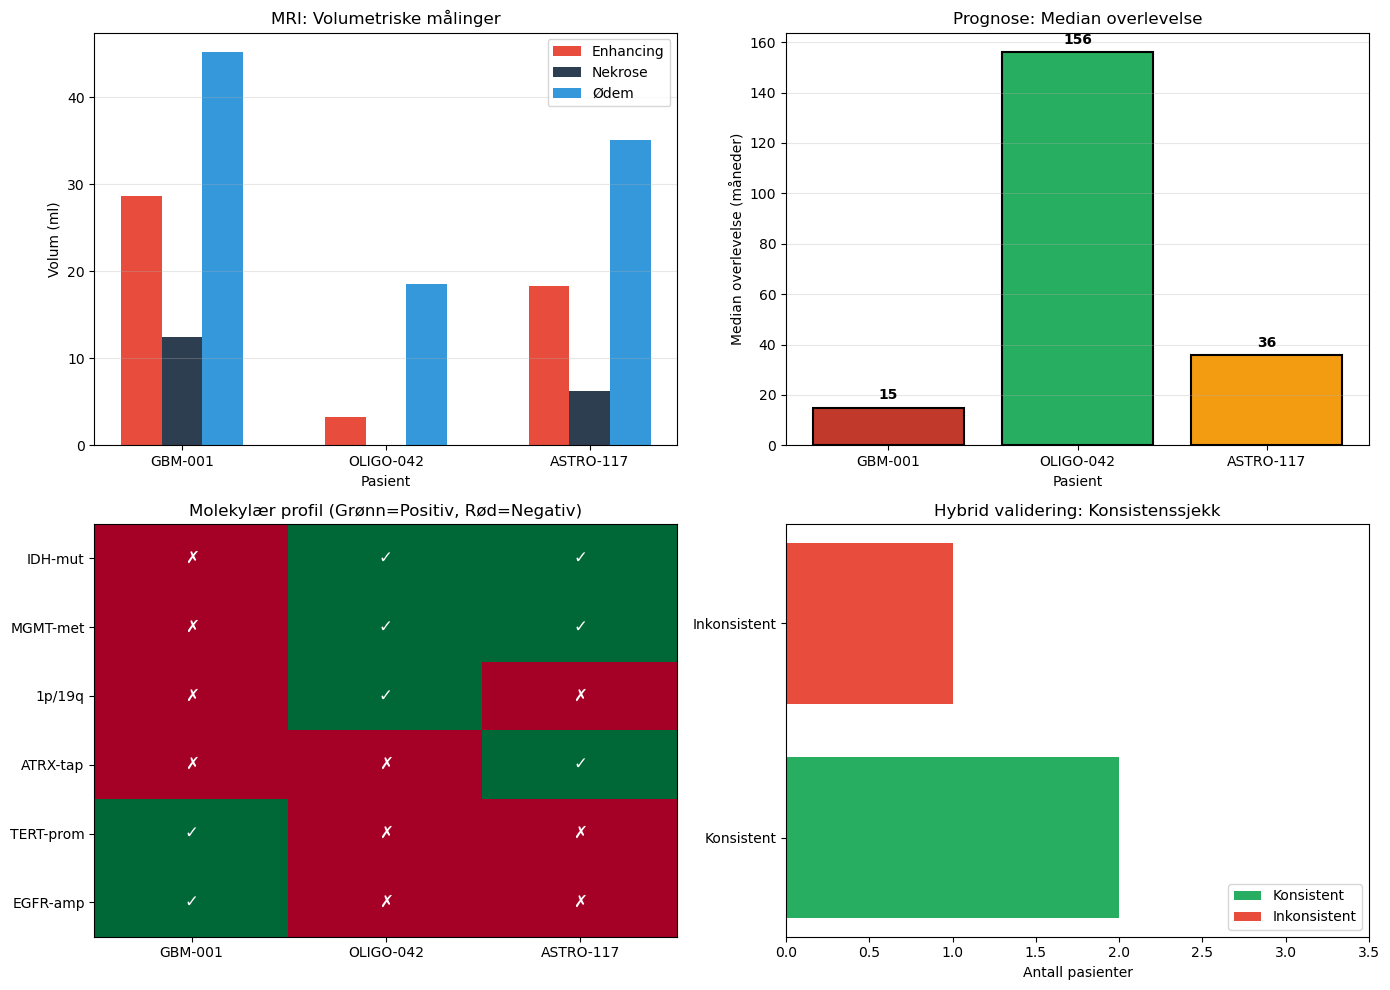


✓ Figur lagret som 'gliom_analyse_sammenligning.png'


In [15]:
# ============================================================================
# VISUALISERING: Sammenligning av pasientene
# ============================================================================

import matplotlib.pyplot as plt

def visualiser_pasient_sammenligning(pasienter: List[GliomPasient], 
                                      resultater: List[Dict]):
    """
    Visualiserer og sammenligner de tre pasientcasene.
    """
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # --- Plot 1: MRI-volumetriske features ---
    ax1 = axes[0, 0]
    x = np.arange(len(pasienter))
    width = 0.2
    
    enhancing = [p.mri.enhancing_volum_ml for p in pasienter]
    nekrose = [p.mri.nekrose_volum_ml for p in pasienter]
    ødem = [p.mri.ødem_volum_ml for p in pasienter]
    
    ax1.bar(x - width, enhancing, width, label='Enhancing', color='#e74c3c')
    ax1.bar(x, nekrose, width, label='Nekrose', color='#2c3e50')
    ax1.bar(x + width, ødem, width, label='Ødem', color='#3498db')
    
    ax1.set_ylabel('Volum (ml)')
    ax1.set_xlabel('Pasient')
    ax1.set_title('MRI: Volumetriske målinger')
    ax1.set_xticks(x)
    ax1.set_xticklabels([p.pasient_id for p in pasienter])
    ax1.legend()
    ax1.grid(axis='y', alpha=0.3)
    
    # --- Plot 2: Prognose-sammenligning ---
    ax2 = axes[0, 1]
    tumor_typer = [r["symbolsk_klassifikasjon"]["tumor_type"] for r in resultater]
    overlevelser = []
    
    for tt in tumor_typer:
        info = kg.tumor_typer.get(tt, {})
        overlevelser.append(info.get("median_overlevelse_måneder", 0))
    
    colors = ['#c0392b', '#27ae60', '#f39c12']
    bars = ax2.bar(x, overlevelser, color=colors, edgecolor='black', linewidth=1.5)
    
    ax2.set_ylabel('Median overlevelse (måneder)')
    ax2.set_xlabel('Pasient')
    ax2.set_title('Prognose: Median overlevelse')
    ax2.set_xticks(x)
    ax2.set_xticklabels([p.pasient_id for p in pasienter])
    
    # Legg til verdier på søylene
    for bar, val in zip(bars, overlevelser):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
                 f'{val:.0f}', ha='center', va='bottom', fontweight='bold')
    ax2.grid(axis='y', alpha=0.3)
    
    # --- Plot 3: Molekylær profil som heatmap ---
    ax3 = axes[1, 0]
    
    profil_data = []
    for p in pasienter:
        mol = p.molekylær
        profil_data.append([
            1 if mol.idh_status == IDHStatus.MUTERT else 0,
            1 if mol.mgmt_status == MGMTStatus.METYLERT else 0,
            1 if mol.kodeletion_1p19q else 0,
            1 if mol.atrx_tap else 0,
            1 if mol.tert_promoter else 0,
            1 if mol.egfr_amplifisering else 0
        ])
    
    profil_matrix = np.array(profil_data)
    im = ax3.imshow(profil_matrix.T, cmap='RdYlGn', aspect='auto', vmin=0, vmax=1)
    
    ax3.set_yticks(range(6))
    ax3.set_yticklabels(['IDH-mut', 'MGMT-met', '1p/19q', 'ATRX-tap', 
                         'TERT-prom', 'EGFR-amp'])
    ax3.set_xticks(range(len(pasienter)))
    ax3.set_xticklabels([p.pasient_id for p in pasienter])
    ax3.set_title('Molekylær profil (Grønn=Positiv, Rød=Negativ)')
    
    # Legg til verdier i cellene
    for i in range(len(pasienter)):
        for j in range(6):
            text = '✓' if profil_matrix[i, j] else '✗'
            ax3.text(i, j, text, ha='center', va='center', 
                     color='white', fontsize=12, fontweight='bold')
    
    # --- Plot 4: Validerings-status ---
    ax4 = axes[1, 1]
    
    # Forbered data
    kategorier = ['Konsistent', 'Advarsler']
    konsistent = [1 if r["hybrid_validering"]["konsistent"] else 0 for r in resultater]
    advarsler = [len(r["hybrid_validering"]["advarsler"]) for r in resultater]
    
    x_pos = np.arange(len(pasienter))
    
    ax4.barh([0], [sum(konsistent)], color='#27ae60', label='Konsistent', height=0.3)
    ax4.barh([0.4], [len(pasienter) - sum(konsistent)], color='#e74c3c', 
             label='Inkonsistent', height=0.3)
    
    ax4.set_xlim(0, len(pasienter) + 0.5)
    ax4.set_yticks([0, 0.4])
    ax4.set_yticklabels(['Konsistent', 'Inkonsistent'])
    ax4.set_xlabel('Antall pasienter')
    ax4.set_title('Hybrid validering: Konsistenssjekk')
    ax4.legend(loc='lower right')
    
    plt.tight_layout()
    plt.savefig('gliom_analyse_sammenligning.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    print("\n✓ Figur lagret som 'gliom_analyse_sammenligning.png'")

# Kjør visualisering
visualiser_pasient_sammenligning(
    [pasient_a, pasient_b, pasient_c],
    [resultat_a, resultat_b, resultat_c]
)

### Oppsummering av gliom-casestudien

#### Hva demonstrerte vi?

| Komponent | Teknologi | Funksjon |
|-----------|-----------|----------|
| **Nevral** | 3D U-Net, Radiogenomikk | MRI-segmentering, molekylær prediksjon |
| **Symbolsk** | Kunnskapsgraf, Ontologi | WHO-klassifikasjon, behandlingsregler |
| **Hybrid** | Konsistenssjekk | Validering, forklaring |

#### Fordeler med nevrosymbolsk tilnærming for gliom

1. **Forklarbarhet**: Klinikeren kan følge resonnementet fra MRI → Klassifikasjon → Behandling
2. **Robusthet**: Symbolsk validering fanger opp feil i nevrale prediksjoner
3. **Oppdaterbarhet**: Nye WHO-regler kan enkelt legges til kunnskapsgrafen
4. **Datamangel**: Kan utnytte eksisterende medisinsk kunnskap når data er begrenset

#### Klinisk relevans

- **Beslutningsstøtte**: Hjelper nevrokirurger og onkologer med kompleks klassifikasjon
- **Kvalitetssikring**: Automatisk sjekk av molekylær-histologisk samsvar
- **Prognose**: Kombinerer bildebaserte og molekylære biomarkører
- **Personalisert behandling**: Stratifisering basert på MGMT, IDH, etc.

#### Begrensninger og fremtidige retninger

- **Data**: Krever validering på større kohorter (f.eks. TCGA, CGGA)
- **Usikkerhet**: Bedre kvantifisering av epistemisk usikkerhet
- **Integrasjon**: Kobling til elektronisk pasientjournal (EPJ)
- **Læring**: Kontinuerlig oppdatering basert på nye utfall

### Agentisk AI: Neste steg for klinisk beslutningsstøtte

**Agentisk AI** (agentic AI) representerer en naturlig utvidelse av nevrosymbolsk AI der systemet kan:
- **Handle autonomt**: Ta initiativ til handlinger basert på mål
- **Planlegge**: Bryte ned komplekse oppgaver i delmål
- **Bruke verktøy**: Integrere med eksterne systemer og databaser
- **Resonnere**: Reflektere over egne handlinger og tilpasse strategi
- **Lære**: Forbedre seg basert på feedback

#### Hvordan agentisk AI kunne forbedre gliom-systemet

I vårt nevrosymbolske gliom-system kunne en **AI-agent** orkestrere hele arbeidsflyten:

```
┌─────────────────────────────────────────────────────────────────────┐
│                     AGENTISK GLIOM-ASSISTENT                        │
├─────────────────────────────────────────────────────────────────────┤
│                                                                     │
│  PASIENTHENVISNING MOTTAS                                           │
│          ↓                                                          │
│  ┌─────────────────┐                                                │
│  │   AI-AGENT      │ ← Mål: "Gi optimal behandlingsanbefaling"      │
│  └────────┬────────┘                                                │
│           │                                                         │
│  PLANLEGGING: Hvilke steg trengs?                                   │
│           │                                                         │
│           ├──→ [1] Hent MRI fra PACS                                │
│           │         ↓                                               │
│           ├──→ [2] Kjør segmentering (nnU-Net)                      │
│           │         ↓                                               │
│           ├──→ [3] Hent molekylære prøvesvar fra lab-system         │
│           │         ↓                                               │
│           ├──→ [4] Klassifiser tumor (WHO 2021)                     │
│           │         ↓                                               │
│           ├──→ [5] Søk i litteraturdatabaser (PubMed, etc.)         │
│           │         ↓                                               │
│           ├──→ [6] Finn lignende pasienter i biobank                │
│           │         ↓                                               │
│           ├──→ [7] Generer behandlingsanbefaling                    │
│           │         ↓                                               │
│           └──→ [8] Skriv rapport til MDT-møte                       │
│                                                                     │
│  REFLEKSJON: Er resultatet konsistent? Trenger jeg mer info?        │
│                                                                     │
└─────────────────────────────────────────────────────────────────────┘
```

#### Nøkkelegenskaper ved agentisk gliom-AI

| Egenskap | Beskrivelse | Eksempel |
|----------|-------------|----------|
| **Verktøybruk** | Kaller eksterne API-er og systemer | Henter bilder fra PACS, søker i PubMed |
| **Planlegging** | Dekomponerer komplekse mål | "Klassifiser tumor" → flere delmål |
| **Minne** | Husker tidligere interaksjoner | Oppfølging av samme pasient over tid |
| **Refleksjon** | Evaluerer egne handlinger | "Er IDH-prediksjon konsistent med histologi?" |
| **Human-in-the-loop** | Involverer kliniker ved usikkerhet | "Usikker klassifikasjon - vennligst verifiser" |

In [16]:
# ============================================================================
# AGENTISK AI: Simulert agent for gliom-analyse
# ============================================================================

from abc import ABC, abstractmethod
from datetime import datetime
import time

class Verktøy(ABC):
    """Abstrakt baseklasse for verktøy som agenten kan bruke."""
    
    @property
    @abstractmethod
    def navn(self) -> str:
        pass
    
    @property
    @abstractmethod
    def beskrivelse(self) -> str:
        pass
    
    @abstractmethod
    def kjør(self, **kwargs) -> Dict:
        pass

class PACSVerktøy(Verktøy):
    """Verktøy for å hente bilder fra PACS-systemet."""
    
    @property
    def navn(self) -> str:
        return "hent_mri_fra_pacs"
    
    @property
    def beskrivelse(self) -> str:
        return "Henter MRI-bilder fra sykehuset PACS-system basert på pasient-ID"
    
    def kjør(self, pasient_id: str) -> Dict:
        # Simulerer API-kall til PACS
        print(f"    🔧 Kobler til PACS-server...")
        time.sleep(0.3)
        print(f"    📥 Henter MRI for pasient {pasient_id}...")
        return {
            "status": "suksess",
            "modaliteter": ["T1", "T1Gd", "T2", "FLAIR"],
            "antall_serier": 4,
            "dato": "2024-01-15"
        }

class LitteratursøkVerktøy(Verktøy):
    """Verktøy for å søke i medisinsk litteratur."""
    
    @property
    def navn(self) -> str:
        return "søk_pubmed"
    
    @property
    def beskrivelse(self) -> str:
        return "Søker i PubMed etter relevante artikler basert på tumortype og markører"
    
    def kjør(self, tumor_type: str, markører: List[str]) -> Dict:
        print(f"    🔧 Søker PubMed for '{tumor_type}'...")
        time.sleep(0.3)
        # Simulerte resultater
        return {
            "status": "suksess",
            "antall_treff": 127,
            "topp_artikler": [
                {"tittel": "IDH mutations in gliomas: NEJM 2023", "relevans": 0.95},
                {"tittel": "MGMT methylation as predictor: Lancet Oncol 2024", "relevans": 0.91},
                {"tittel": "Novel treatment strategies: JCO 2024", "relevans": 0.88}
            ]
        }

class BiobankVerktøy(Verktøy):
    """Verktøy for å finne lignende pasienter i biobank."""
    
    @property
    def navn(self) -> str:
        return "søk_biobank"
    
    @property
    def beskrivelse(self) -> str:
        return "Finner lignende pasienter i biobanken basert på molekylær profil"
    
    def kjør(self, molekylær_profil: Dict) -> Dict:
        print(f"    🔧 Søker i biobank etter lignende profiler...")
        time.sleep(0.3)
        return {
            "status": "suksess",
            "lignende_pasienter": 23,
            "median_overlevelse": 18.5,
            "behandlingsrespons": {
                "temozolomid": 0.72,
                "stråling": 0.85
            }
        }

class AgentMinne:
    """Lagrer agentens handlingshistorikk og observasjoner."""
    
    def __init__(self):
        self.handlinger: List[Dict] = []
        self.observasjoner: List[str] = []
        self.refleksjoner: List[str] = []
    
    def logg_handling(self, handling: str, resultat: Dict):
        self.handlinger.append({
            "tidspunkt": datetime.now().isoformat(),
            "handling": handling,
            "resultat": resultat
        })
    
    def logg_observasjon(self, observasjon: str):
        self.observasjoner.append(observasjon)
    
    def logg_refleksjon(self, refleksjon: str):
        self.refleksjoner.append(refleksjon)

class GliomAgent:
    """
    Agentisk AI-system for gliom-analyse.
    
    Kombinerer:
    - Nevrosymbolsk resonnering (fra tidligere)
    - Verktøybruk (PACS, PubMed, biobank)
    - Planlegging og refleksjon
    - Human-in-the-loop ved usikkerhet
    """
    
    def __init__(self, ns_system: NevrosymbolskGliomSystem):
        self.ns_system = ns_system
        self.verktøy = {
            "pacs": PACSVerktøy(),
            "pubmed": LitteratursøkVerktøy(),
            "biobank": BiobankVerktøy()
        }
        self.minne = AgentMinne()
        self.usikkerhetsterskel = 0.7
    
    def planlegg(self, mål: str) -> List[str]:
        """Planlegger handlinger for å oppnå målet."""
        print("\n📋 PLANLEGGING")
        print("-" * 40)
        
        plan = [
            "1. Hent MRI-bilder fra PACS",
            "2. Kjør nevrosymbolsk analyse",
            "3. Søk etter lignende case i biobank",
            "4. Finn relevant litteratur",
            "5. Evaluer konsistens",
            "6. Generer anbefaling (eller eskalér til kliniker)"
        ]
        
        print(f"  Mål: {mål}")
        print(f"  Plan:")
        for steg in plan:
            print(f"    {steg}")
        
        return plan
    
    def utfør_plan(self, pasient: GliomPasient) -> Dict:
        """Utfører planen steg for steg med refleksjon."""
        
        mål = f"Gi optimal behandlingsanbefaling for pasient {pasient.pasient_id}"
        plan = self.planlegg(mål)
        
        resultater = {}
        
        # Steg 1: Hent MRI
        print("\n🔄 STEG 1: Henter MRI fra PACS")
        print("-" * 40)
        pacs_resultat = self.verktøy["pacs"].kjør(pasient_id=pasient.pasient_id)
        resultater["pacs"] = pacs_resultat
        self.minne.logg_handling("hent_mri", pacs_resultat)
        print(f"    ✓ Mottok {pacs_resultat['antall_serier']} MRI-serier")
        
        # Steg 2: Nevrosymbolsk analyse
        print("\n🔄 STEG 2: Kjører nevrosymbolsk analyse")
        print("-" * 40)
        ns_resultat = self.ns_system.analyser_pasient(pasient)
        resultater["nevrosymbolsk"] = ns_resultat
        self.minne.logg_handling("nevrosymbolsk_analyse", {"tumor_type": ns_resultat["symbolsk_klassifikasjon"]["tumor_type"]})
        
        # Steg 3: Biobank-søk
        print("\n🔄 STEG 3: Søker i biobank")
        print("-" * 40)
        biobank_resultat = self.verktøy["biobank"].kjør(
            molekylær_profil={"idh": pasient.molekylær.idh_status.value}
        )
        resultater["biobank"] = biobank_resultat
        self.minne.logg_handling("biobank_søk", biobank_resultat)
        print(f"    ✓ Fant {biobank_resultat['lignende_pasienter']} lignende pasienter")
        
        # Steg 4: Litteratursøk
        print("\n🔄 STEG 4: Søker i medisinsk litteratur")
        print("-" * 40)
        tumor_type = ns_resultat["symbolsk_klassifikasjon"]["tumor_type"]
        pubmed_resultat = self.verktøy["pubmed"].kjør(
            tumor_type=tumor_type,
            markører=[pasient.molekylær.idh_status.value]
        )
        resultater["pubmed"] = pubmed_resultat
        self.minne.logg_handling("litteratursøk", pubmed_resultat)
        print(f"    ✓ Fant {pubmed_resultat['antall_treff']} relevante artikler")
        
        # Steg 5: Refleksjon
        print("\n🤔 STEG 5: Agentens refleksjon")
        print("-" * 40)
        refleksjon = self.reflekter(resultater)
        resultater["refleksjon"] = refleksjon
        
        # Steg 6: Beslutning
        print("\n📊 STEG 6: Endelig anbefaling")
        print("-" * 40)
        
        if refleksjon["trenger_human_review"]:
            print("  ⚠️  ESKALERER TIL KLINIKER")
            print(f"      Grunn: {refleksjon['eskaleringsgrunn']}")
            print("      → Anbefaler MDT-diskusjon før behandlingsstart")
        else:
            print("  ✓ Anbefaling klar for klinisk vurdering")
            for beh in ns_resultat["behandlingsanbefaling"]["primær_behandling"]:
                print(f"      • {beh}")
        
        return resultater
    
    def reflekter(self, resultater: Dict) -> Dict:
        """
        Agenten reflekterer over sine funn og vurderer usikkerhet.
        Dette er et kjerneaspekt ved agentisk AI.
        """
        refleksjon = {
            "observasjoner": [],
            "usikkerhetsvurdering": "",
            "trenger_human_review": False,
            "eskaleringsgrunn": None
        }
        
        # Sjekk konsistens i nevrosymbolsk analyse
        ns_res = resultater.get("nevrosymbolsk", {})
        if not ns_res.get("hybrid_validering", {}).get("konsistent", True):
            refleksjon["observasjoner"].append(
                "Inkonsistens mellom nevrale prediksjoner og symbolsk klassifikasjon"
            )
            refleksjon["trenger_human_review"] = True
            refleksjon["eskaleringsgrunn"] = "Inkonsistens i analyse - krever manuell verifisering"
        
        # Sjekk om biobank-data støtter anbefalingen
        biobank_res = resultater.get("biobank", {})
        if biobank_res.get("lignende_pasienter", 0) < 10:
            refleksjon["observasjoner"].append(
                "Få lignende pasienter i biobank - begrenset evidensgrunnlag"
            )
        
        # Sjekk litteraturstøtte
        pubmed_res = resultater.get("pubmed", {})
        if pubmed_res.get("topp_artikler"):
            høyeste_relevans = pubmed_res["topp_artikler"][0].get("relevans", 0)
            if høyeste_relevans < 0.8:
                refleksjon["observasjoner"].append(
                    "Begrenset direkte litteraturstøtte for denne profilen"
                )
        
        # Oppsummer
        if refleksjon["trenger_human_review"]:
            refleksjon["usikkerhetsvurdering"] = "HØY - krever klinisk vurdering"
            print(f"  ⚠️  Usikkerhet: {refleksjon['usikkerhetsvurdering']}")
        else:
            refleksjon["usikkerhetsvurdering"] = "MODERAT - anbefaling kan presenteres"
            print(f"  ✓ Usikkerhet: {refleksjon['usikkerhetsvurdering']}")
        
        for obs in refleksjon["observasjoner"]:
            print(f"  → Observasjon: {obs}")
            self.minne.logg_observasjon(obs)
        
        self.minne.logg_refleksjon(refleksjon["usikkerhetsvurdering"])
        
        return refleksjon

print("✓ Agentisk AI-rammeverk definert")
print("  - Verktøy: PACS, PubMed, Biobank")
print("  - Kapabiliteter: Planlegging, Refleksjon, Human-in-the-loop")

✓ Agentisk AI-rammeverk definert
  - Verktøy: PACS, PubMed, Biobank
  - Kapabiliteter: Planlegging, Refleksjon, Human-in-the-loop


In [17]:
# ============================================================================
# DEMONSTRASJON: Agentisk analyse av gliom-pasient
# ============================================================================

print("=" * 70)
print("AGENTISK GLIOM-ANALYSE: Fullstendig arbeidsflyt")
print("=" * 70)

# Opprett agenten
agent = GliomAgent(ns_system)

# Kjør agent på pasient C (den med inkonsistens - interessant for agenten!)
print("\n🤖 Starter agentisk analyse av Pasient C (ASTRO-117)")
print("   Denne pasienten har potensielle inkonsistenser som agenten må håndtere\n")

agent_resultater = agent.utfør_plan(pasient_c)

# Vis agentens minne
print("\n" + "=" * 70)
print("AGENTENS MINNE (handlingslogg)")
print("=" * 70)
print(f"\nAntall handlinger utført: {len(agent.minne.handlinger)}")
print(f"Antall observasjoner: {len(agent.minne.observasjoner)}")
print(f"Refleksjoner: {agent.minne.refleksjoner}")

AGENTISK GLIOM-ANALYSE: Fullstendig arbeidsflyt

🤖 Starter agentisk analyse av Pasient C (ASTRO-117)
   Denne pasienten har potensielle inkonsistenser som agenten må håndtere


📋 PLANLEGGING
----------------------------------------
  Mål: Gi optimal behandlingsanbefaling for pasient ASTRO-117
  Plan:
    1. Hent MRI-bilder fra PACS
    2. Kjør nevrosymbolsk analyse
    3. Søk etter lignende case i biobank
    4. Finn relevant litteratur
    5. Evaluer konsistens
    6. Generer anbefaling (eller eskalér til kliniker)

🔄 STEG 1: Henter MRI fra PACS
----------------------------------------
    🔧 Kobler til PACS-server...
    📥 Henter MRI for pasient ASTRO-117...
    ✓ Mottok 4 MRI-serier

🔄 STEG 2: Kjører nevrosymbolsk analyse
----------------------------------------

NEVROSYMBOLSK ANALYSE: Pasient ASTRO-117

[STEG 1] NEVRAL KOMPONENT: MRI-analyse
----------------------------------------
  Tumorvolum: 48.7 ml
  Enhancing: 18.3 ml (37.6%)
  Nekrose: 6.2 ml
  Ødem: 35.1 ml
  Lokalisasjon: p

### Oppsummering: Agentisk AI i medisin

#### Fordeler med agentisk tilnærming

| Aspekt | Tradisjonell AI | Agentisk AI |
|--------|-----------------|-------------|
| **Arbeidsflyt** | Enkelt modellkall | Orkestrerer flere steg |
| **Verktøy** | Ingen | Integrerer med PACS, EPJ, databaser |
| **Usikkerhet** | Passiv rapportering | Aktiv eskalering til kliniker |
| **Kontekst** | Stateless | Minne over tid |
| **Tilpasning** | Fast pipeline | Dynamisk planlegging |

#### Klinisk relevans

1. **Redusert kognitiv belastning**: Agenten håndterer rutineoppgaver
2. **Kvalitetssikring**: Automatisk konsistenssjekk og litteraturstøtte
3. **Dokumentasjon**: Full sporbarhet av beslutningsgrunnlag
4. **Skalerbarhet**: Kan håndtere mange pasienter parallelt

#### Utfordringer og etikk

- **Ansvar**: Hvem er ansvarlig når agenten tar feil?
- **Transparens**: Må kunne forklare alle handlinger
- **Kontroll**: Human-in-the-loop er essensielt
- **Sikkerhet**: Må ikke utføre skadelige handlinger

#### Fremtidsvisjon: LLM-baserte medisinske agenter

Med fremveksten av store språkmodeller (LLM) kan medisinske agenter:
- Forstå naturlig språk fra klinikere
- Resonnere over komplekse medisinske case
- Generere strukturerte rapporter
- Lære fra feedback over tid

> **Viktig**: Agentisk AI i medisin må alltid operere under menneskelig tilsyn, 
> spesielt for kritiske beslutninger som behandlingsvalg.

In [18]:
# ============================================================================
# INTERAKTIV UTFORSKNING: Lag din egen pasient
# ============================================================================

def lag_tilfeldig_pasient(seed: int = None) -> GliomPasient:
    """
    Genererer en tilfeldig gliom-pasient for utforskning.
    Prøv å endre parametrene og se hvordan klassifikasjonen endres!
    """
    if seed is not None:
        np.random.seed(seed)
    
    # Tilfeldig molekylær profil
    idh = np.random.choice([IDHStatus.VILLTYPE, IDHStatus.MUTERT], p=[0.4, 0.6])
    mgmt = np.random.choice([MGMTStatus.METYLERT, MGMTStatus.UMETYLERT], p=[0.45, 0.55])
    
    # Hvis IDH-mutert, bestem subtype
    if idh == IDHStatus.MUTERT:
        er_oligo = np.random.choice([True, False], p=[0.35, 0.65])
    else:
        er_oligo = False
    
    molekylær = MolekylærProfil(
        idh_status=idh,
        mgmt_status=mgmt,
        kodeletion_1p19q=er_oligo,
        atrx_tap=not er_oligo and idh == IDHStatus.MUTERT,
        tert_promoter=idh == IDHStatus.VILLTYPE and np.random.random() > 0.3,
        egfr_amplifisering=idh == IDHStatus.VILLTYPE and np.random.random() > 0.6
    )
    
    # Tilfeldig MRI
    tumor_vol = np.random.uniform(15, 100)
    mri = MRIFeatures(
        tumor_volum_ml=round(tumor_vol, 1),
        enhancing_volum_ml=round(np.random.uniform(0, tumor_vol * 0.5), 1),
        nekrose_volum_ml=round(np.random.uniform(0, tumor_vol * 0.2), 1) if idh == IDHStatus.VILLTYPE else 0,
        ødem_volum_ml=round(np.random.uniform(5, tumor_vol * 0.8), 1),
        lokalisasjon=np.random.choice(["frontal", "temporal", "parietal", "occipital"])
    )
    
    # Tilfeldig klinisk profil
    klinisk = KliniskProfil(
        alder=np.random.randint(25, 80),
        karnofsky_score=np.random.choice([60, 70, 80, 90, 100]),
        symptom_varighet_uker=np.random.randint(2, 24)
    )
    
    return GliomPasient(
        pasient_id=f"RANDOM-{np.random.randint(1000, 9999)}",
        molekylær=molekylær,
        mri=mri,
        klinisk=klinisk
    )

# Generer og analyser en tilfeldig pasient
print("=" * 60)
print("GENERERER TILFELDIG PASIENT FOR UTFORSKNING")
print("=" * 60)
print("\nTips: Kjør denne cellen flere ganger for å se ulike case!")
print("Endre 'seed' parameter for reproduserbare resultater.\n")

tilfeldig_pasient = lag_tilfeldig_pasient(seed=2024)
resultat_tilfeldig = ns_system.analyser_pasient(tilfeldig_pasient)

GENERERER TILFELDIG PASIENT FOR UTFORSKNING

Tips: Kjør denne cellen flere ganger for å se ulike case!
Endre 'seed' parameter for reproduserbare resultater.


NEVROSYMBOLSK ANALYSE: Pasient RANDOM-2532

[STEG 1] NEVRAL KOMPONENT: MRI-analyse
----------------------------------------
  Tumorvolum: 18.7 ml
  Enhancing: 1.9 ml (10.2%)
  Nekrose: 0 ml
  Ødem: 6.1 ml
  Lokalisasjon: occipital

  Radiogenomikk-prediksjoner:
    IDH-villtype: 34% (usikkerhet: moderat)
    MGMT-metylert: 31% (usikkerhet: høy)

[STEG 2] SYMBOLSK KOMPONENT: WHO-klassifikasjon
----------------------------------------
  Anvendte regler:
    → IDH-mutasjon påvist
    → 1p/19q ko-delesjon påvist → Oligodendrogliom
  Konklusjon: Oligodendrogliom, grad 2

[STEG 3] HYBRID VALIDERING: Konsistenssjekk
----------------------------------------
  ✓ Nevrale prediksjoner er KONSISTENTE med symbolsk klassifikasjon

[STEG 4] BEHANDLINGSANBEFALING: Regelbasert
----------------------------------------
  Primær behandling:

[STEG 5

---

## 7. Fremtidsperspektiver

### Hvorfor nevrosymbolsk AI er viktig for medisin

1. **Forklarbarhet**: Symbolsk kunnskap gir meningsfulle forklaringer
2. **Robusthet**: Ontologier fanger opp feil og inkonsistenser
3. **Datamangel**: Kan utnytte eksisterende medisinsk kunnskap
4. **Regulering**: Lettere å verifisere og godkjenne
5. **Tillit**: Leger forstår resonnementet

### Aktive forskningsområder

- Knowledge-enhanced LLMs (f.eks. kobling av GPT til SNOMED)
- Neural-symbolic reasoning i biomedisinske grafer
- Ontology learning fra ustrukturert tekst
- Forklaring av dype modeller via symbolsk mapping

---

## Oppsummering

### Hovedpunkter

1. **To AI-tradisjoner**: Symbolsk (tolkbar, regelbasert) vs. nevral (lærer fra data)
2. **Nevrosymbolsk AI** kombinerer styrkene til begge tilnærminger
3. **Kunnskapsgrafer** representerer medisinsk kunnskap som nettverk av entiteter og relasjoner
4. **Ontologier** (SNOMED, ICD, WHO CNS-klassifikasjon) gir standardisert vokabular
5. **Hybrid systemer** gir bedre forklarbarhet, robusthet og konsistenssjekking
6. **Gliom-casestudien** demonstrerer praktisk nevrosymbolsk AI i nevro-onkologi:
   - Nevral komponent: MRI-segmentering og radiogenomikk
   - Symbolsk komponent: WHO 2021-klassifikasjon og behandlingsregler
   - Hybrid validering: Automatisk oppdagelse av inkonsistenser
7. **Agentisk AI** utvider nevrosymbolsk AI med:
   - Autonom planlegging og handling
   - Verktøybruk (PACS, databaser, litteratursøk)
   - Refleksjon og human-in-the-loop ved usikkerhet
   - Minne og kontekstuell forståelse over tid

### Refleksjonsoppgaver

1. **Kunnskapsgrafer**: Hvordan kunne en kunnskapsgraf forbedret et AI-system du kjenner til?

2. **Medisinske domener**: Hvilke andre medisinske domener (utover nevro-onkologi) tror du har mest nytte av nevrosymbolsk AI? Tenk på områder med:
   - Rik domenekunskap (ontologier, retningslinjer)
   - Behov for forklarbarhet
   - Kritiske beslutninger

3. **Gliom-casen**: I gliom-casestudien så vi at systemet kunne oppdage inkonsistenser mellom MRI-features og molekylær profil. Hvorfor er dette viktig klinisk?

4. **Regulering**: Hvordan kan nevrosymbolsk AI gjøre det enklere å få godkjent medisinsk AI-programvare (f.eks. som medisinsk utstyr)?

5. **Utfordringer**: Hva ser du som de største utfordringene med å implementere nevrosymbolsk AI i klinisk praksis?

6. **Agentisk AI**: I demonstrasjonen så vi hvordan en AI-agent kunne orkestrere hele arbeidsflyten fra MRI til behandlingsanbefaling. Hvilke fordeler og risikoer ser du med slike autonome systemer i helsevesenet? Når bør agenten alltid eskalere til en kliniker?

---

### Videre lesning

- [Neuro-Symbolic AI: The 3rd Wave](https://arxiv.org/abs/2012.05876) - Garcez & Lamb (2020)
- [WHO Classification of Tumours of the CNS, 5th Edition (2021)](https://tumourclassification.iarc.who.int/)
- [BraTS Challenge](https://www.synapse.org/brats) - Brain Tumor Segmentation
- [Knowledge Graphs in Healthcare](https://doi.org/10.1016/j.jbi.2020.103602) - Nicholson & Greene (2020)

---

*Neste notebook: [09 - ChatGPT/Claude API](09-chatgpt-claude-api.ipynb)*